# 4.10 Instacart Final Task
## Contents
### Import Libraries and Dataframes
### Create regional segmentation of data
### Determine whether there’s a difference in spending habits between the different U.S. regions
### Create an exclusion flag for low-activity customers
### Customer profiling
### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### Compare customer profiles with regions and departments
### Visualizations

In [2]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path 
path = r'/Users/milenafagandini/Desktop/Instacart'

In [4]:
# Import dataframe from last exercise 
ords_prods_cust = pd.read_parquet(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_optimized.parquet'))


#Create a regional segmentation of the data

In [6]:
# Check the df that we are working with 
ords_prods_cust.head()

order_id user_id eval_set  order_number  orders_day_of_week  time_of_order  \
0  2539329       1    prior             1                   2              8   
1  2539329       1    prior             1                   2              8   
2  2539329       1    prior             1                   2              8   
3  2539329       1    prior             1                   2              8   
4  2539329       1    prior             1                   2              8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     NaN         196                  1          0  ...   
1                     NaN       14084                  2          0  ...   
2                     NaN       12427                  3          0  ...   
3                     NaN       26088                  4          0  ...   
4                     NaN       26405                  5          0  ...   

  first_name  surname  gender    state age date_joined n_dependants  \
0      Linda   Nguyen  Female  Alabama  31   2/17/2019            3   
1      Linda   Nguyen  Female  Alabama  31   2/17/2019            3   
2      Linda   Nguyen  Female  Alabama  31   2/17/2019            3   
3      Linda   Nguyen  Female  Alabama  31   2/17/2019            3   
4      Linda   Nguyen  Female  Alabama  31   2/17/2019            3   

  marital_status  income _merge  
0        married   40423   both  
1        married   40423   both  
2        married   40423   both  
3        married   40423   both  
4        married   40423   both  

[5 rows x 34 columns]

In [7]:
# Assign Northeast Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Maine', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New Hampshire', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Vermont', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Massachusetts', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Rhode Island', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Connecticut', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New York', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Pennsylvania', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New Jersey', 'region'] = 'Northeast'

In [8]:
# Assign Midwest Region Division 3
ords_prods_cust.loc[ords_prods_cust['state'] == 'Wisconsin', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Michigan', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Illinois', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Indiana', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Ohio', 'region'] = 'Midwest'

In [9]:
# Assign Midwest Region Divison 4 
ords_prods_cust.loc[ords_prods_cust['state'] == 'North Dakota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'South Dakota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Nebraska', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Kansas', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Minnesota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Iowa', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Missouri', 'region'] = 'Midwest'

In [10]:
# Assign South Region Division 5
ords_prods_cust.loc[ords_prods_cust['state'] == 'Delaware', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Maryland', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'District of Columbia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Virginia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'West Virginia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'North Carolina', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'South Carolina', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Georgia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Florida', 'region'] = 'South'

In [11]:
# Assign South Division 6 and 7
ords_prods_cust.loc[ords_prods_cust['state'] == 'Kentucky', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Tennessee', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Mississippi', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Alabama', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Oklahoma', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Texas', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Arkansas', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Louisiana', 'region'] = 'South'

In [12]:
# Assign West Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Idaho', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Montana', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Wyoming', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Nevada', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Utah', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Colorado', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Arizona', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New Mexico', 'region'] = 'West'

In [13]:
# Division 9 
ords_prods_cust.loc[ords_prods_cust['state'] == 'Alaska', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Washington', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Oregon', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'California', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Hawaii', 'region'] = 'West'

In [14]:
# Check our results 
ords_prods_cust.head()

order_id user_id eval_set  order_number  orders_day_of_week  time_of_order  \
0  2539329       1    prior             1                   2              8   
1  2539329       1    prior             1                   2              8   
2  2539329       1    prior             1                   2              8   
3  2539329       1    prior             1                   2              8   
4  2539329       1    prior             1                   2              8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     NaN         196                  1          0  ...   
1                     NaN       14084                  2          0  ...   
2                     NaN       12427                  3          0  ...   
3                     NaN       26088                  4          0  ...   
4                     NaN       26405                  5          0  ...   

  surname  gender    state  age date_joined n_dependants marital_status  \
0  Nguyen  Female  Alabama   31   2/17/2019            3        married   
1  Nguyen  Female  Alabama   31   2/17/2019            3        married   
2  Nguyen  Female  Alabama   31   2/17/2019            3        married   
3  Nguyen  Female  Alabama   31   2/17/2019            3        married   
4  Nguyen  Female  Alabama   31   2/17/2019            3        married   

  income  _merge region  
0  40423    both  South  
1  40423    both  South  
2  40423    both  South  
3  40423    both  South  
4  40423    both  South  

[5 rows x 35 columns]

### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [16]:
# Crosstab variables region with spending flag
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['income'], dropna = False)

In [17]:
crosstab.to_clipboard()

In [18]:
# Save changes
ords_prods_cust.to_parquet(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.parquet'), index=False)


The South region has a significantly higher number of both high and low spenders compared to other regions. This could be attributed to the fact that it comprises the most states, resulting in a larger population. Therefore, it would not be practical to assume that spending habits are influenced by geographical distribution alone.

### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

First by income

In [21]:
# Create a flag for customers with less than 5 orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [22]:
ords_prods_cust['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [23]:
# Exclude low-activity customers from the dataframe
df_excluded = ords_prods_cust[ords_prods_cust['activity_flag'] != 'low-activity customer']

In [24]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [26]:
# Create an income group variable
df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['income'] > 55000) & (df_excluded['income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['income'] > 150000, 'income_group'] = 'high-income'

/var/folders/x_/nvg20gdn1dggf_rxhsn2bcnh0000gn/T/ipykernel_70207/1030381792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'


In [27]:
# Check our results
df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    22617642
low-income        4452388
high-income       3894534
Name: count, dtype: int64

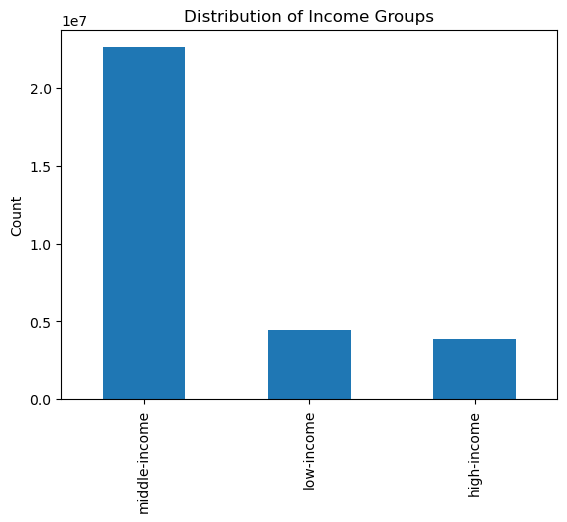

In [28]:
# Make a bar chart 
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [29]:
# Export the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar.png'))

Now by age

In [31]:
# Create an age group variable
df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['age'] > 25) & (df_excluded['age'] <= 44), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['age'] > 44) & (df_excluded['age'] <= 64), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['age'] > 64, 'age_group'] = 'senior'

/var/folders/x_/nvg20gdn1dggf_rxhsn2bcnh0000gn/T/ipykernel_70207/2854730798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'


In [32]:
# Check for results
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    9690051
adult          9214451
senior         8195544
young adult    3864518
Name: count, dtype: int64

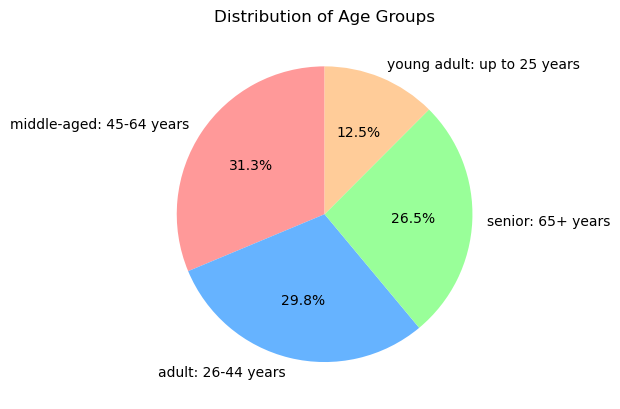

In [33]:
# Make a pie chart 
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [34]:
# Export chart
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

Now by dependants 

In [36]:
# Create a dependents flag
df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['n_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

/var/folders/x_/nvg20gdn1dggf_rxhsn2bcnh0000gn/T/ipykernel_70207/2552754020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [37]:
# Check our results
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

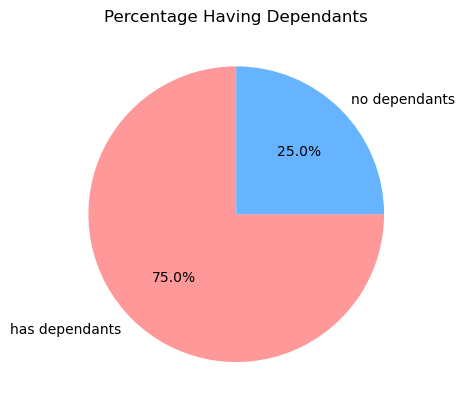

In [38]:
# Make a pie chart
dependants_pie = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependants')
plt.show()

Analyze Loyalty and Age group

In [40]:
# Crosstab loyalty with age group
loyalty_age_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna = False)
loyalty_age_cross

age_group           adult  middle-aged   senior  young adult
loyalty_flag                                                
Loyal customer    3048175      3231509  2723958      1280451
New customer      1420508      1506670  1276659       599858
Regular customer  4745768      4951872  4194927      1984209

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

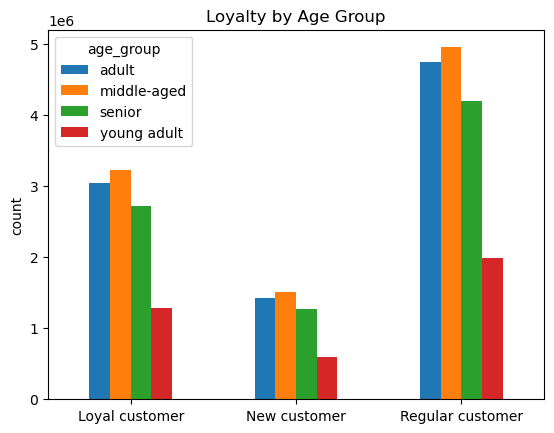

In [41]:
# bar chart
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [42]:
# Export the chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending_bar.png'))

In [43]:
print(df_excluded.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       '_merge', 'region', 'activity_flag', 'income_group', 'age_group',
       'dependants_flag'],
      dtype='object')


In [44]:
# Crosstab spending with age group
spending_age_cross = pd.crosstab(df_excluded['spending_flag'], df_excluded['age_group'], dropna = False)
spending_age_cross

age_group        adult  middle-aged   senior  young adult
spending_flag                                            
High spender    174740       197797   156886        74002
Low spender    9039711      9492254  8038658      3790516

(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

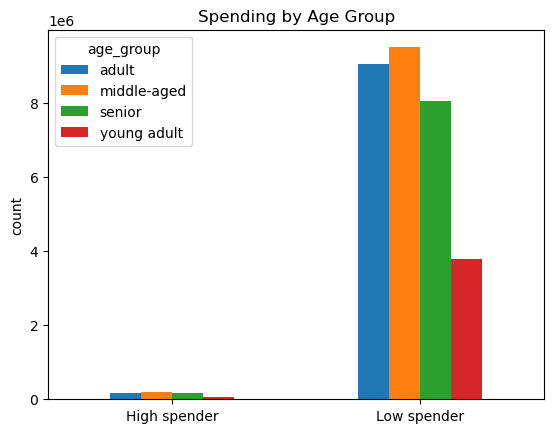

In [45]:
# Create bar chart
spending_age_bar = spending_age_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [46]:
# Export the chart
spending_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age_group_bar.png'))

Look into orders by department 

In [48]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [49]:
dept

Unnamed: 0       department
0            1           frozen
1            2            other
2            3           bakery
3            4          produce
4            5          alcohol
5            6    international
6            7        beverages
7            8             pets
8            9  dry goods pasta
9           10             bulk
10          11    personal care
11          12     meat seafood
12          13           pantry
13          14        breakfast
14          15     canned goods
15          16       dairy eggs
16          17        household
17          18           babies
18          19           snacks
19          20             deli
20          21          missing

In [50]:
dept.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)
df_final_merged = df_excluded.merge(dept, on='department_id', indicator='created')

In [51]:
# Export new dataframe with department merged 
df_final_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

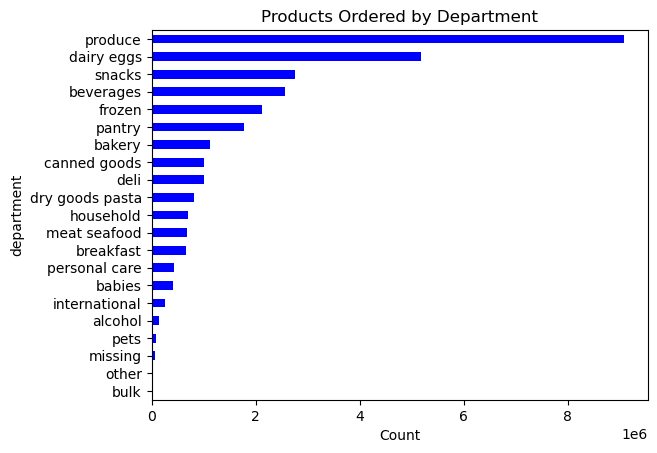

In [52]:
# Create bar chart
depts_bar = df_final_merged['department'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Products Ordered by Department')

In [53]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar.png'))

Analyze age and department

In [55]:
# Create crosstab 
age_dept_cross = pd.crosstab(df_final_merged['age_group'], df_final_merged['department'], dropna = False)
age_dept_cross

department   alcohol  babies  bakery  beverages  breakfast   bulk  \
age_group                                                           
adult          42167  123044  334154     754851     198803   9902   
middle-aged    46579  129910  350804     814687     211274  10298   
senior         36693  106204  295997     684020     175296   8945   
young adult    19188   51234  139873     318343      85477   4306   

department   canned goods  dairy eggs    deli  dry goods pasta  ...  \
age_group                                                       ...   
adult              302479     1549127  299970           243702  ...   
middle-aged        315774     1612490  314110           256920  ...   
senior             267509     1368072  265199           217316  ...   
young adult        126312      647493  124555           104198  ...   

department   household  international  meat seafood  missing  other  pantry  \
age_group                                                                     
adult           207553          76675        199124    19130  10198  529307   
middle-aged     218860          79743        209927    20340  10811  558929   
senior          186630          67199        181150    16915   8946  472383   
young adult      86814          32374         84580     8383   4456  222086   

department   personal care   pets  produce  snacks  
age_group                                           
adult               125522  27034  2712590  824677  
middle-aged         134736  28293  2830853  867564  
senior              111052  25115  2408104  728549  
young adult          52996  12618  1127726  345616  

[4 rows x 21 columns]

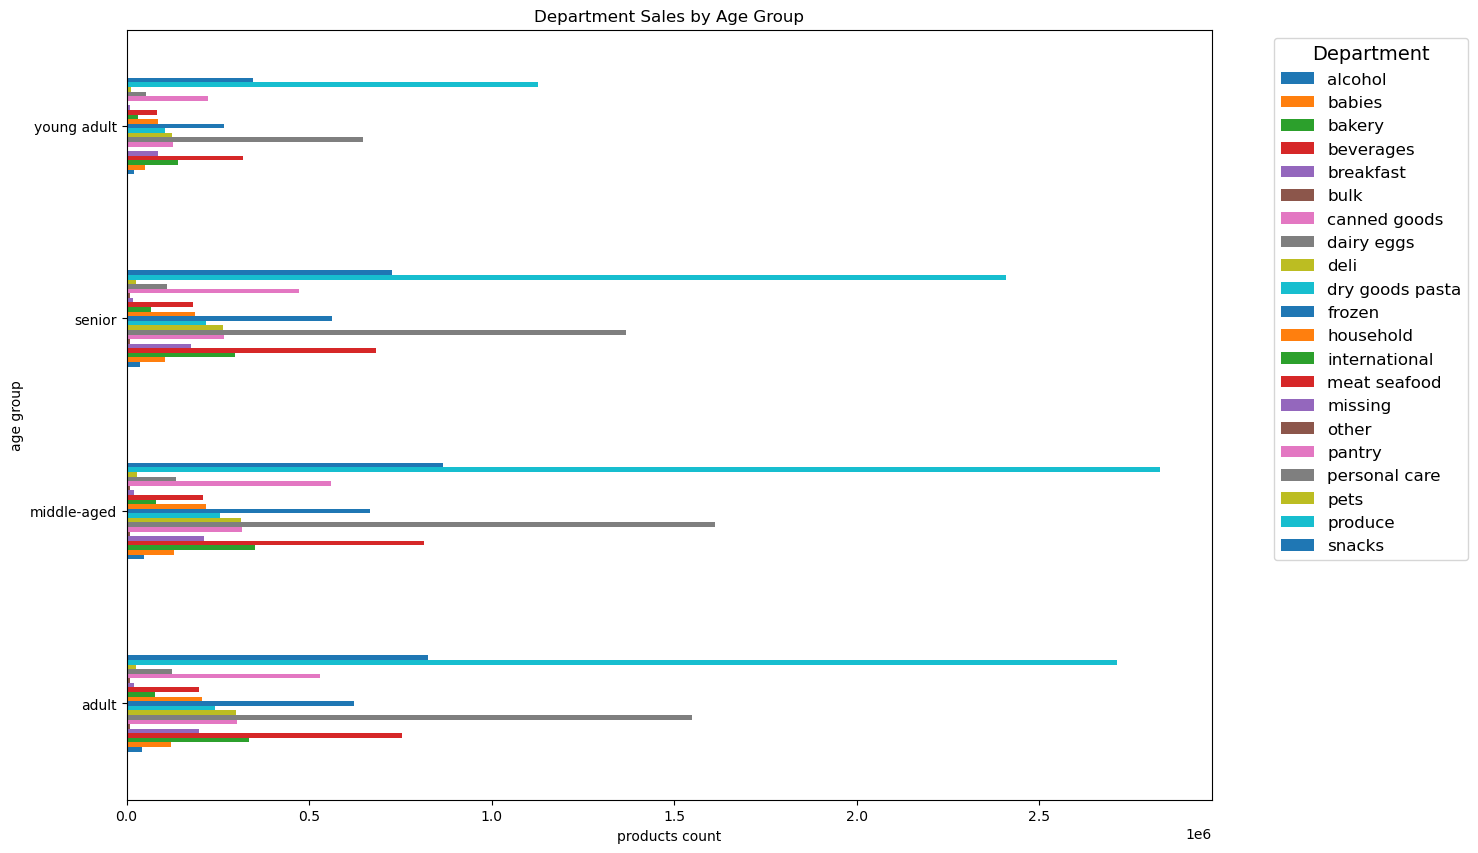

In [56]:
# Create bar chart
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [57]:
# Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depts_bar.png'))

Analyze income and department


In [59]:
# Create crosstab
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department'], dropna = False)
income_dept_cross

department     alcohol  babies  bakery  beverages  breakfast   bulk  \
income_group                                                          
high-income      24067   53001  148430     313325      83418   3671   
low-income       22199   43438  144086     479742     116540   5974   
middle-income    98361  313953  828312    1778834     470892  23806   

department     canned goods  dairy eggs    deli  dry goods pasta  ...  \
income_group                                                      ...   
high-income          132389      659149  125886           106335  ...   
low-income           112945      680816  141758            92401  ...   
middle-income        766740     3837217  736190           623400  ...   

department     household  international  meat seafood  missing  other  \
income_group                                                            
high-income        92674          32822         91514     8253   4554   
low-income        111508          30240         54717     8902   4958   
middle-income     495675         192929        528550    47613  24899   

department      pantry  personal care   pets  produce   snacks  
income_group                                                    
high-income     231915          53530  12991  1134490   305779  
low-income      226221          62888  11782  1139552   673753  
middle-income  1324569         307888  68287  6805231  1786874  

[3 rows x 21 columns]

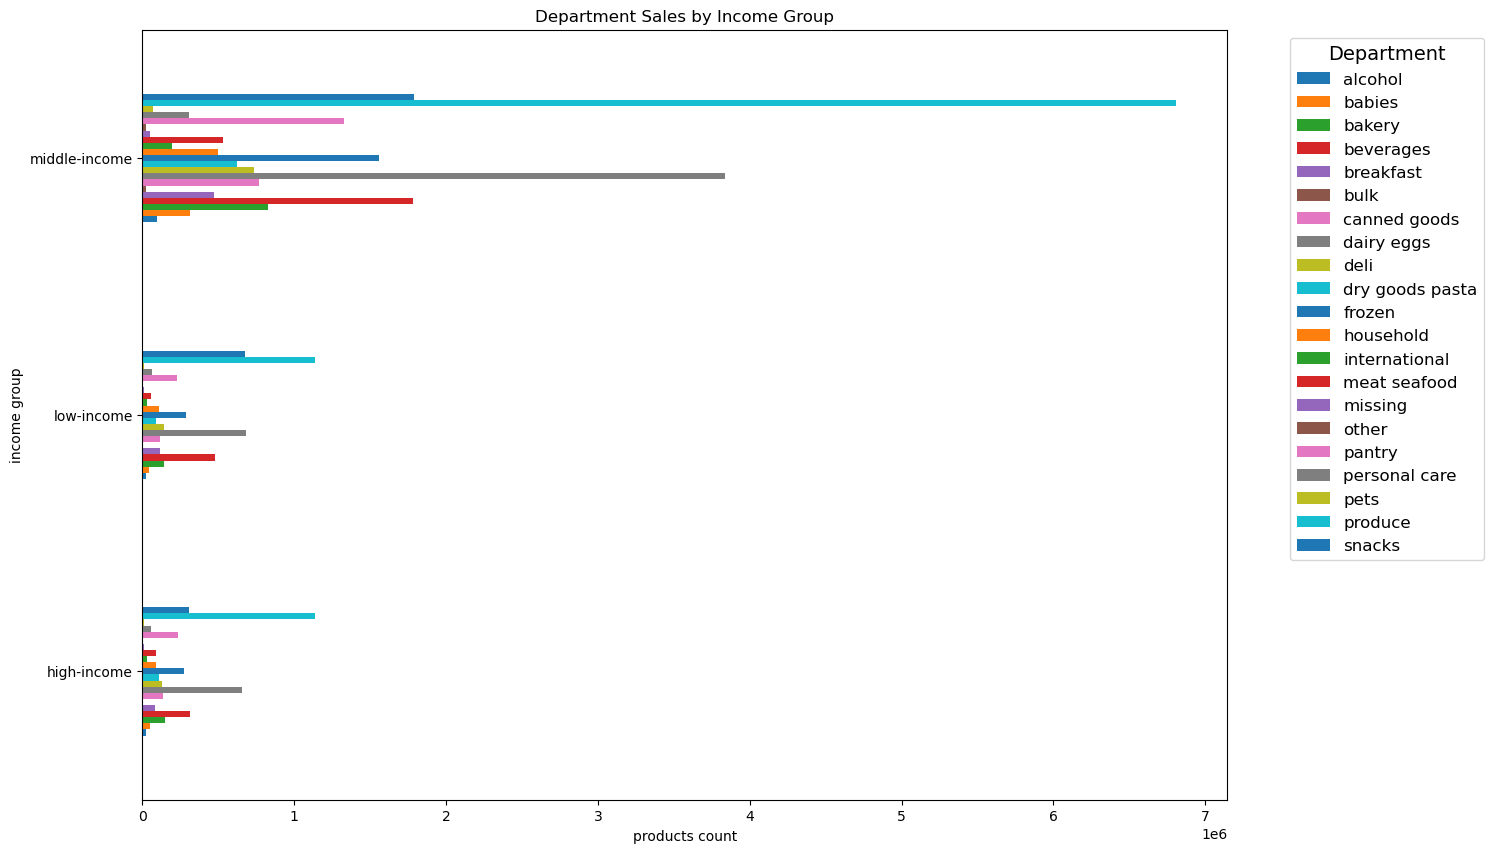

In [60]:
# Create bar chart
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [61]:
# Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_depts_bar.png'))

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [63]:
# Aggregate variables for customer profiles for expenditure
df_final_merged.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

/var/folders/x_/nvg20gdn1dggf_rxhsn2bcnh0000gn/T/ipykernel_70207/4034095180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final_merged.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})


order_number                     prices               
                 max  min       mean        max  min      mean
user_id                                                       
1               10.0  1.0   5.813559  14.000000  1.0  6.367797
10               5.0  1.0   3.223776  24.200001  1.0  8.651049
100              5.0  1.0   3.555556  21.600000  2.3  9.859260
1000             7.0  1.0   3.980583  15.000000  1.2  8.407767
10000           72.0  1.0  35.973443  24.200001  1.2  8.045421
...              ...  ...        ...        ...  ...       ...
99995            5.0  1.0   3.480000  21.299999  1.2  7.958000
99996           12.0  1.0   5.898438  15.000000  1.1  7.410937
99997            NaN  NaN        NaN        NaN  NaN       NaN
99998            5.0  1.0   3.285714  21.100000  1.8  9.052382
99999           34.0  1.0  16.565350  24.200001  1.1  7.289969

[206209 rows x 6 columns]

In [64]:
# Aggregate variables for customer profiles for usage frequency
df_final_merged.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

/var/folders/x_/nvg20gdn1dggf_rxhsn2bcnh0000gn/T/ipykernel_70207/508806578.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final_merged.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})


order_number                 days_since_prior_order                 
                 max  min       mean                    max   min       mean
user_id                                                                     
1               10.0  1.0   5.813559                   30.0   0.0  20.259260
10               5.0  1.0   3.223776                   30.0  12.0  20.746376
100              5.0  1.0   3.555556                   30.0  18.0  26.320000
1000             7.0  1.0   3.980583                   30.0   5.0  11.647727
10000           72.0  1.0  35.973443                   17.0   0.0   4.949580
...              ...  ...        ...                    ...   ...        ...
99995            5.0  1.0   3.480000                   30.0   6.0  16.086956
99996           12.0  1.0   5.898438                   30.0  15.0  21.672413
99997            NaN  NaN        NaN                    NaN   NaN        NaN
99998            5.0  1.0   3.285714                   12.0   7.0   8.842105
99999           34.0  1.0  16.565350                   24.0   1.0   7.638365

[206209 rows x 6 columns]

## Compare your customer profiles with regions and departments

In [66]:
# Create crosstab 
region_dept_cross = pd.crosstab(df_final_merged['region'], df_final_merged['department'], dropna = False)
region_dept_cross

department  alcohol  babies  bakery  beverages  breakfast   bulk  \
region                                                             
Midwest       34043   95741  261753     598979     156155   7929   
Northeast     25017   72712  199300     462929     117904   5599   
South         48813  139511  371620     859419     223172  11180   
West          36754  102428  288155     650574     173619   8743   

department  canned goods  dairy eggs    deli  dry goods pasta  ...  household  \
region                                                         ...              
Midwest           237459     1212490  234464           193463  ...     166992   
Northeast         176936      914616  178398           143817  ...     124604   
South             337458     1723016  333620           272813  ...     230061   
West              260221     1327060  257352           212043  ...     178200   

department  international  meat seafood  missing  other  pantry  \
region                                                            
Midwest             60666        158260    15563   7983  420334   
Northeast           44678        118571    11512   6268  312731   
South               84649        224120    21787  11579  591754   
West                65998        173830    15906   8581  457886   

department  personal care   pets  produce  snacks  
region                                             
Midwest            100398  21358  2134115  645143  
Northeast           74765  17734  1593004  493154  
South              142496  29909  3027476  916780  
West               106647  24059  2324678  711329  

[4 rows x 21 columns]

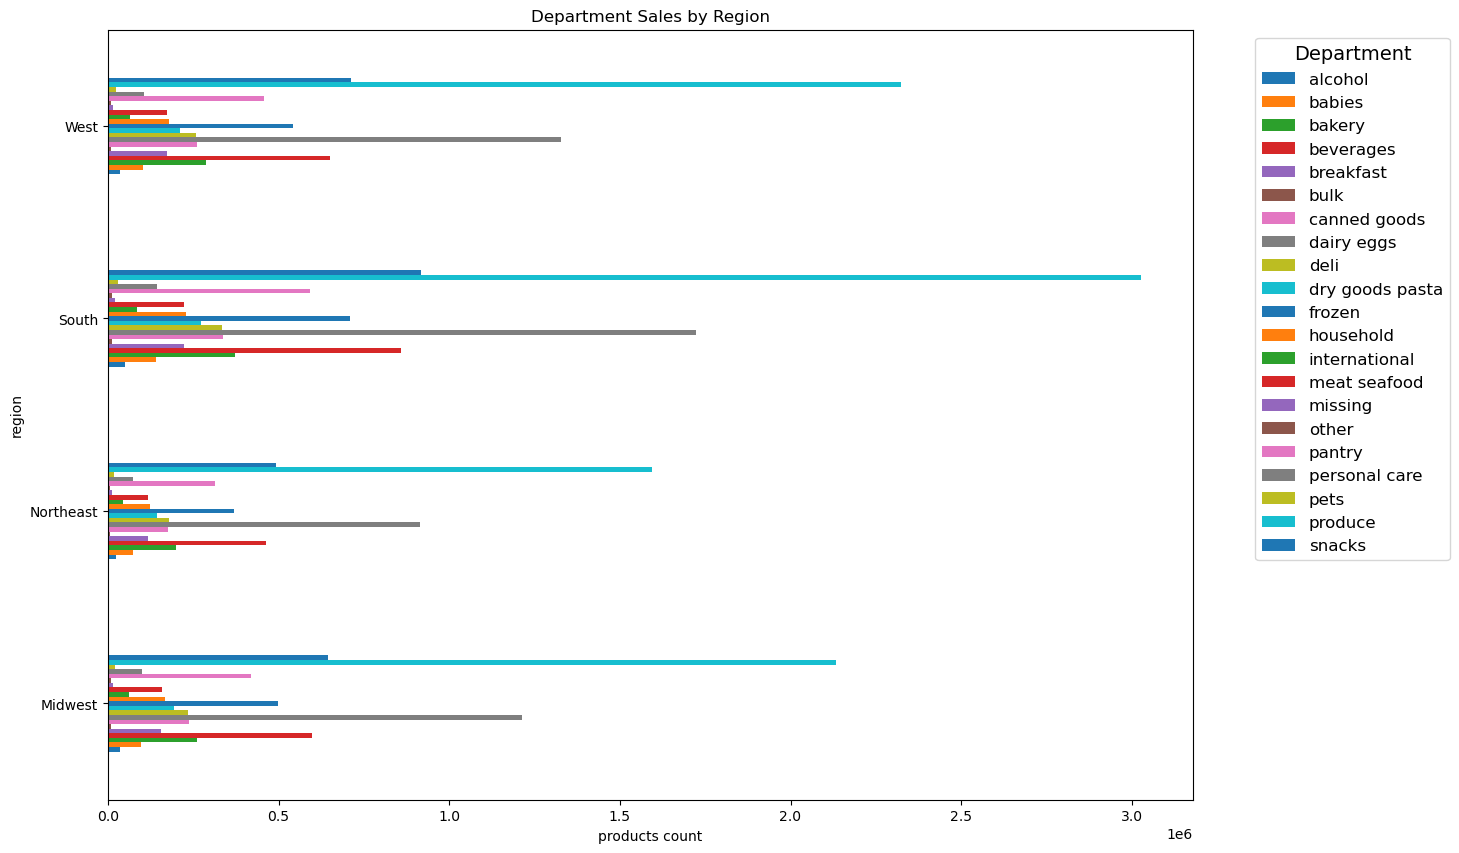

In [67]:
# Create bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [68]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_depts_bar.png'))

In [69]:
# Import orders_products_customers
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))

Text(0.5, 0, '')

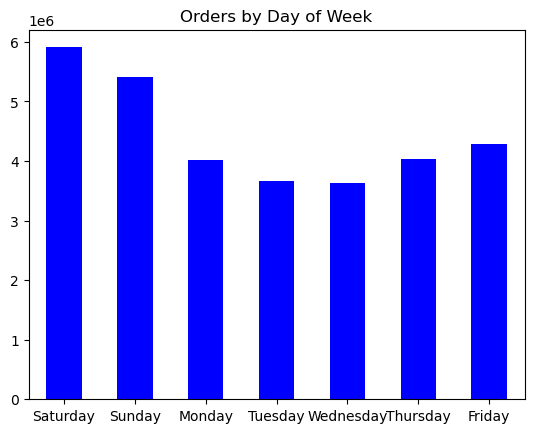

In [70]:
# Create bar chart orders 
orders_dow_bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'blue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [71]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar.png'))

In [72]:
df

order_id user_id eval_set  order_number  orders_day_of_week  \
0         2539329       1    prior             1                   2   
1         2539329       1    prior             1                   2   
2         2539329       1    prior             1                   2   
3         2539329       1    prior             1                   2   
4         2539329       1    prior             1                   2   
...           ...     ...      ...           ...                 ...   
30964559  2977660  206209    prior            13                   1   
30964560  2977660  206209    prior            13                   1   
30964561  2977660  206209    prior            13                   1   
30964562  2977660  206209    prior            13                   1   
30964563  2977660  206209    prior            13                   1   

          time_of_order  days_since_prior_order  product_id  \
0                     8                     NaN         196   
1                     8                     NaN       14084   
2                     8                     NaN       12427   
3                     8                     NaN       26088   
4                     8                     NaN       26405   
...                 ...                     ...         ...   
30964559             12                     7.0       14197   
30964560             12                     7.0       38730   
30964561             12                     7.0       31477   
30964562             12                     7.0        6567   
30964563             12                     7.0       22920   

          add_to_cart_order  reordered  ... marital_status  income  _merge  \
0                         1          0  ...        married   40423    both   
1                         2          0  ...        married   40423    both   
2                         3          0  ...        married   40423    both   
3                         4          0  ...        married   40423    both   
4                         5          0  ...        married   40423    both   
...                     ...        ...  ...            ...     ...     ...   
30964559                  5          1  ...        married  137969    both   
30964560                  6          0  ...        married  137969    both   
30964561                  7          0  ...        married  137969    both   
30964562                  8          0  ...        married  137969    both   
30964563                  9          0  ...        married  137969    both   

           region           activity_flag   income_group age_group  \
0           South  high-activity customer     low-income     adult   
1           South  high-activity customer     low-income     adult   
2           South  high-activity customer     low-income     adult   
3           South  high-activity customer     low-income     adult   
4           South  high-activity customer     low-income     adult   
...           ...                     ...            ...       ...   
30964559  Midwest  high-activity customer  middle-income    senior   
30964560  Midwest  high-activity customer  middle-income    senior   
30964561  Midwest  high-activity customer  middle-income    senior   
30964562  Midwest  high-activity customer  middle-income    senior   
30964563  Midwest  high-activity customer  middle-income    senior   

         dependants_flag       department created  
0         has dependants        beverages    both  
1         has dependants       dairy eggs    both  
2         has dependants           snacks    both  
3         has dependants           snacks    both  
4         has dependants        household    both  
...                  ...              ...     ...  
30964559  has dependants  dry goods pasta    both  
30964560  has dependants           snacks    both  
30964561  has dependants           snacks    both  
30964562  has dependants           snacks    both  
30964563  has dependants           sn

Text(0.5, 0, 'Hour of Day (24 hr clock)')

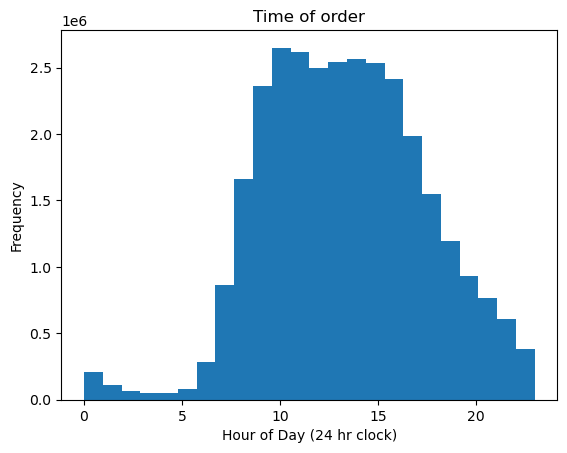

In [73]:
# Create histogram 
hod_hist=df['time_of_order'].plot.hist(bins = 24)
plt.title('Time of order')
plt.xlabel('Hour of Day (24 hr clock)')

In [74]:
# Export histogram
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hod_hist.png'))

In [75]:
# Create rosstab loyalty with age group
loyalty_income_cross = pd.crosstab(df['loyalty_flag'], df['income_group'], dropna = False)
loyalty_income_cross

income_group      high-income  low-income  middle-income
loyalty_flag                                            
Loyal customer        1310941     1381467        7591685
New customer           575272      798804        3429619
Regular customer      2008321     2272117       11596338

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

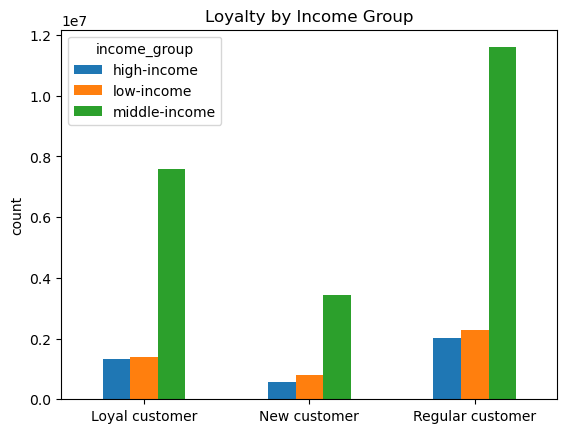

In [76]:
# Create bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [77]:
# Export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_group_bar.png'))

In [78]:
# Create crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)
loyalty_spender_cross

spending_flag     High spender  Low spender
loyalty_flag                               
Loyal customer          216600     10067493
New customer             84011      4719684
Regular customer        302814     15573962

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

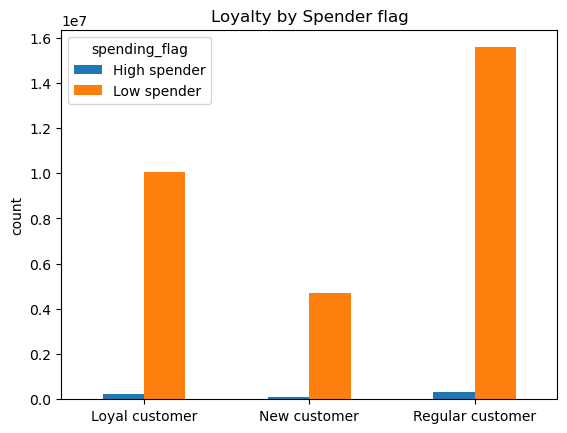

In [79]:
# Create bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [80]:
# Export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spender_bar.png'))

In [81]:
# Create crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(df['loyalty_flag'], df['marital_status'], dropna = False)
loyalty_fam_cross

marital_status    divorced/widowed  living with parents and siblings  \
loyalty_flag                                                           
Loyal customer              882722                            492749   
New customer                403781                            221779   
Regular customer           1358768                            766644   

marital_status     married   single  
loyalty_flag                         
Loyal customer     7202500  1706122  
New customer       3380651   797484  
Regular customer  11160560  2590804

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

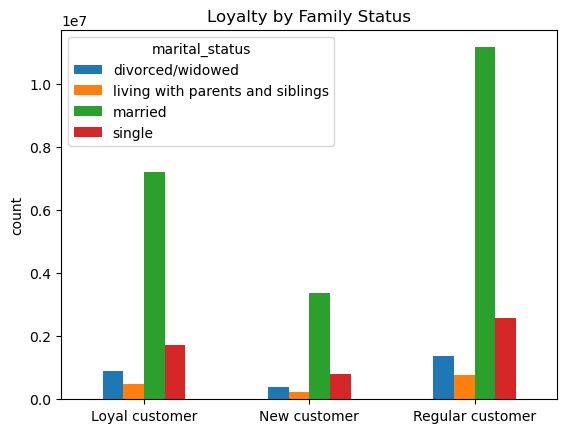

In [82]:
# Create bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [83]:
# Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_fam_bar.png'))

In [84]:
# Create crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(df['loyalty_flag'], df['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag   has dependants  no dependants
loyalty_flag                                   
Loyal customer           7695249        2588844
New customer             3602430        1201265
Regular customer        11927204        3949572

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

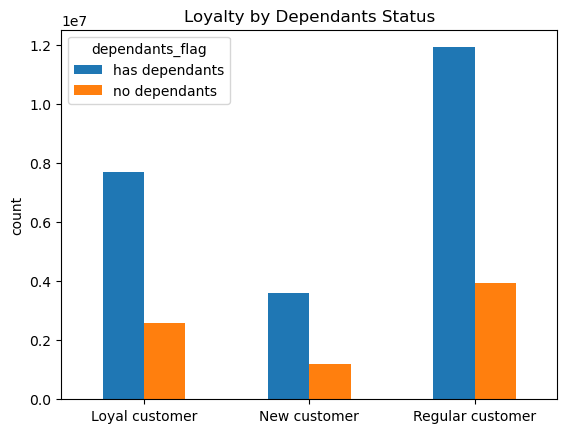

In [85]:
# Create bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [86]:
# Check value counts for marital status
marital_status = df['marital_status'].value_counts(dropna = False)
marital_status

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

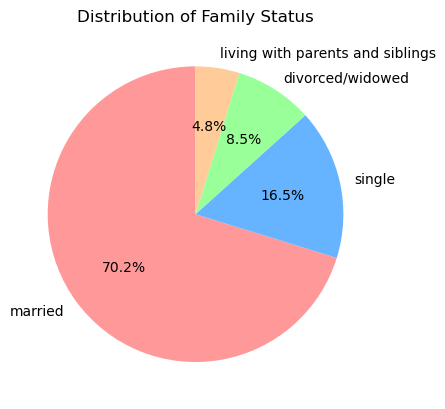

In [87]:
# Create pie chart
marital_status_distribution_pie = marital_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [88]:
# Export the chart
marital_status_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_status_bar.png'))